In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:

data = pd.read_csv('heart.csv')

print(data.head())

print(data.isnull().sum())


data.info()

data.drop_duplicates(inplace=True)


from sklearn.preprocessing import StandardScaler


X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [10]:

rf = RandomForestClassifier()

y_pred_rf = rf_random_search.best_estimator_.predict(X_test)
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)


rf_random_search.fit(X_train, y_train)

print(rf_random_search.best_params_)
print(rf_random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
0.805187074829932


In [11]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [12]:

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.69      0.83      0.75        29

    accuracy                           0.74        61
   macro avg       0.

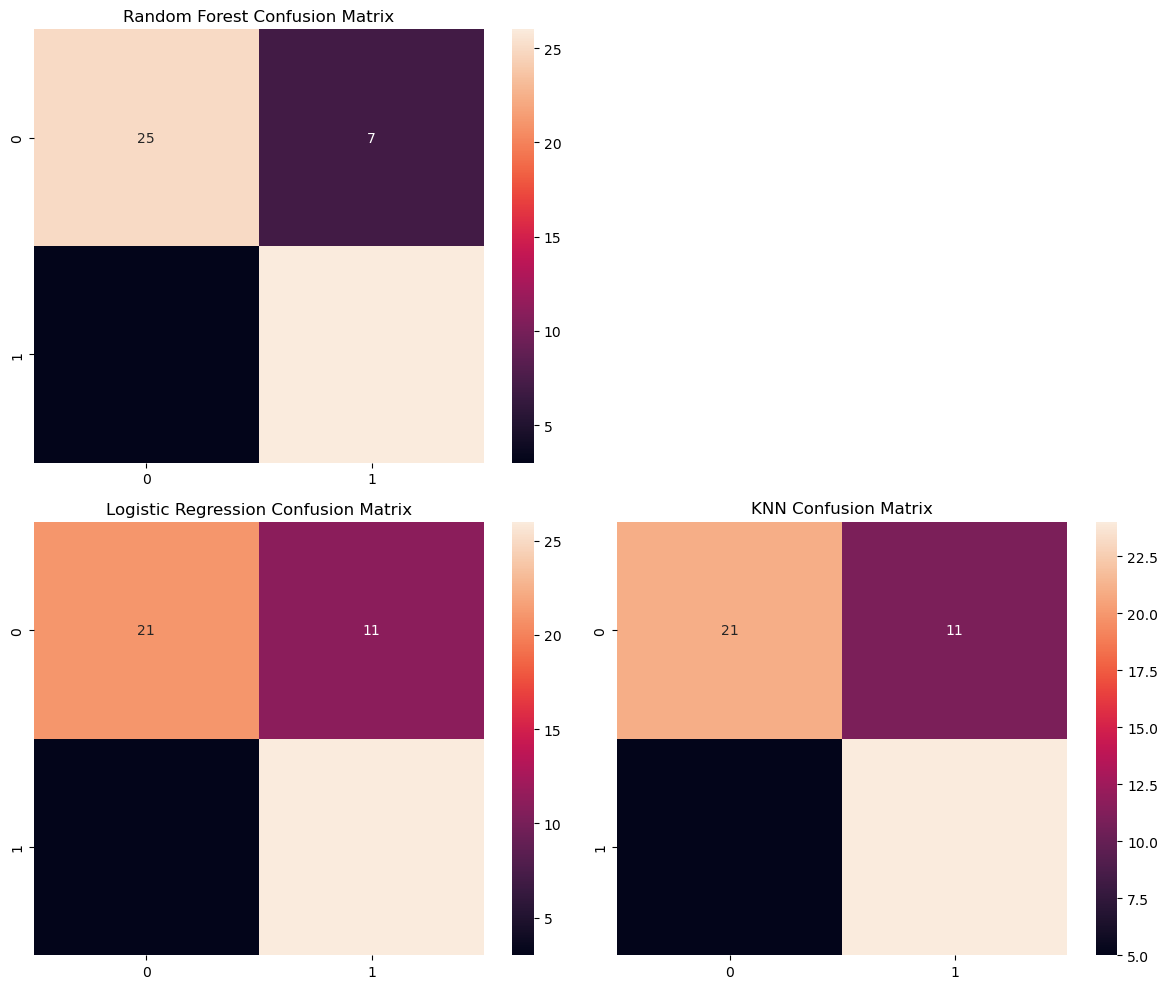

In [13]:

rf_cm = confusion_matrix(y_test, y_pred_rf)
lr_cm = confusion_matrix(y_test, y_pred_lr)
knn_cm = confusion_matrix(y_test, y_pred_knn)


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='g')
plt.title('Random Forest Confusion Matrix')

plt.subplot(2, 2, 3)
sns.heatmap(lr_cm, annot=True, fmt='g')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(2, 2, 4)
sns.heatmap(knn_cm, annot=True, fmt='g')
plt.title('KNN Confusion Matrix')

plt.tight_layout()
plt.show()


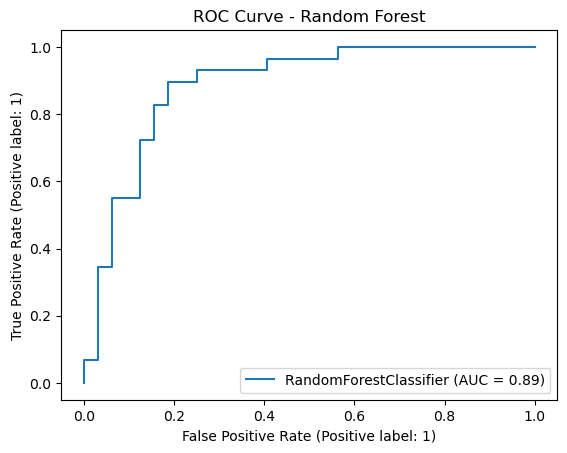

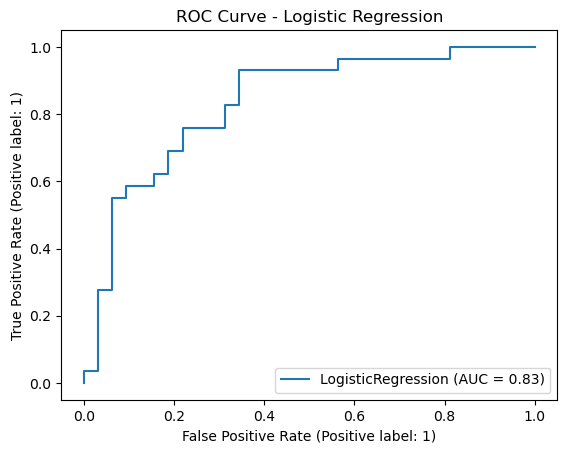

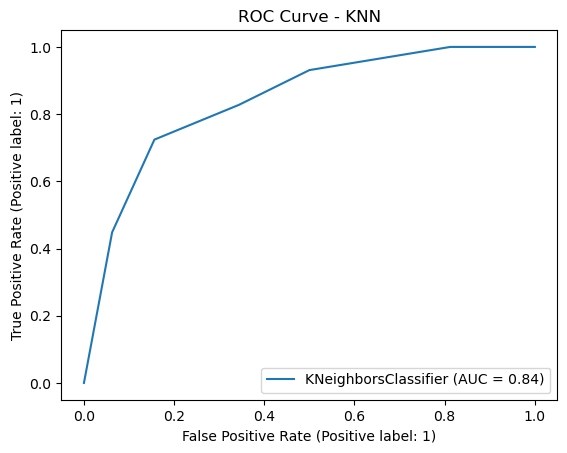

In [14]:

RocCurveDisplay.from_estimator(rf_random_search.best_estimator_, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("ROC Curve - KNN")
plt.show()


C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


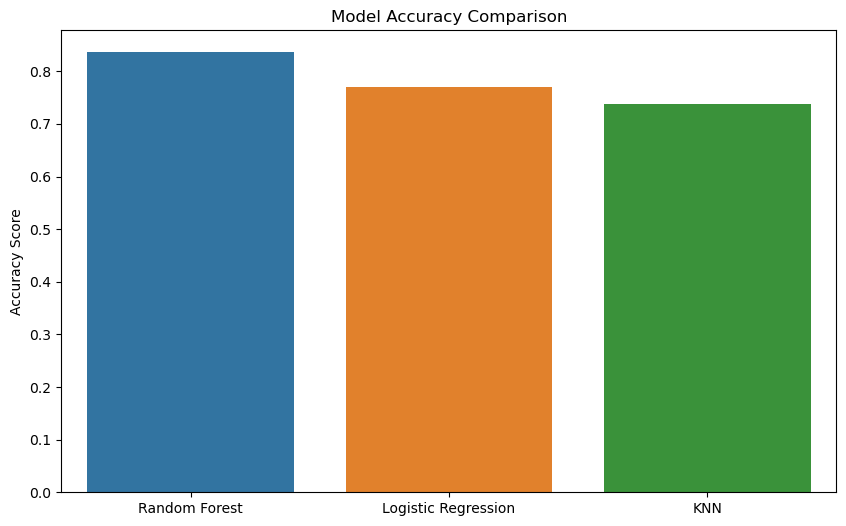

In [15]:

rf_acc = accuracy_score(y_test, y_pred_rf)
lr_acc = accuracy_score(y_test, y_pred_lr)
knn_acc = accuracy_score(y_test, y_pred_knn)


models = ['Random Forest', 'Logistic Regression', 'KNN']
accuracies = [rf_acc, lr_acc, knn_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

model.save('heart_disease_model-2.h5')
print("Model saved in heart_disease_model-2.h5")

Epoch 1/100


C:\Users\shash\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4263 - loss: 0.7341 - val_accuracy: 0.5510 - val_loss: 0.6762
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6203 - loss: 0.6394 - val_accuracy: 0.6531 - val_loss: 0.6275
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7450 - loss: 0.6017 - val_accuracy: 0.7755 - val_loss: 0.5867
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8527 - loss: 0.5303 - val_accuracy: 0.8163 - val_loss: 0.5524
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8705 - loss: 0.4902 - val_accuracy: 0.8163 - val_loss: 0.5257
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8338 - loss: 0.4751 - val_accuracy: 0.8163 - val_loss: 0.5042
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8782 - loss: 0.4176 - val_accuracy: 0.7959 - val_loss: 0.4883
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8773 - loss: 0.3777 - val_accuracy: 0.7959 - val_loss: 0.4789
Epoch 9/

Model saved in heart_disease_model-2.h5
